In [54]:
import numpy as np
import math
import tables
import h5py
import tables
import glob
import h5py
import pandas as pd
import yaml
import matplotlib.pyplot as plt
from matplotlib import colors as clrs
import matplotlib as mpl
import simweights
%matplotlib inline


E_nu_bins = np.concatenate((np.logspace(1,2,1),np.logspace(2,6,8+1)))
E_nu_bin_centers = np.sqrt(E_nu_bins[:-1] * E_nu_bins[1:])
E_mu_bins = np.concatenate((np.logspace(1,2,1),np.logspace(2,6,8+1)))
E_mu_bin_centers = np.sqrt(E_mu_bins[:-1] * E_mu_bins[1:])
gridpts = E_mu_bins
nu_ticks = np.logspace(1,6,6)

In [55]:
import I3Tray
from icecube.icetray import I3Units
from icecube import icetray, dataio, dataclasses
from icecube.simprod import segments
import numpy as np

import collections
from icecube.hdfwriter import I3HDFTableService, I3HDFWriter

from icecube.dataclasses import I3Double, I3Particle, I3Direction, I3Position, I3VectorI3Particle, I3Constants, I3VectorOMKey

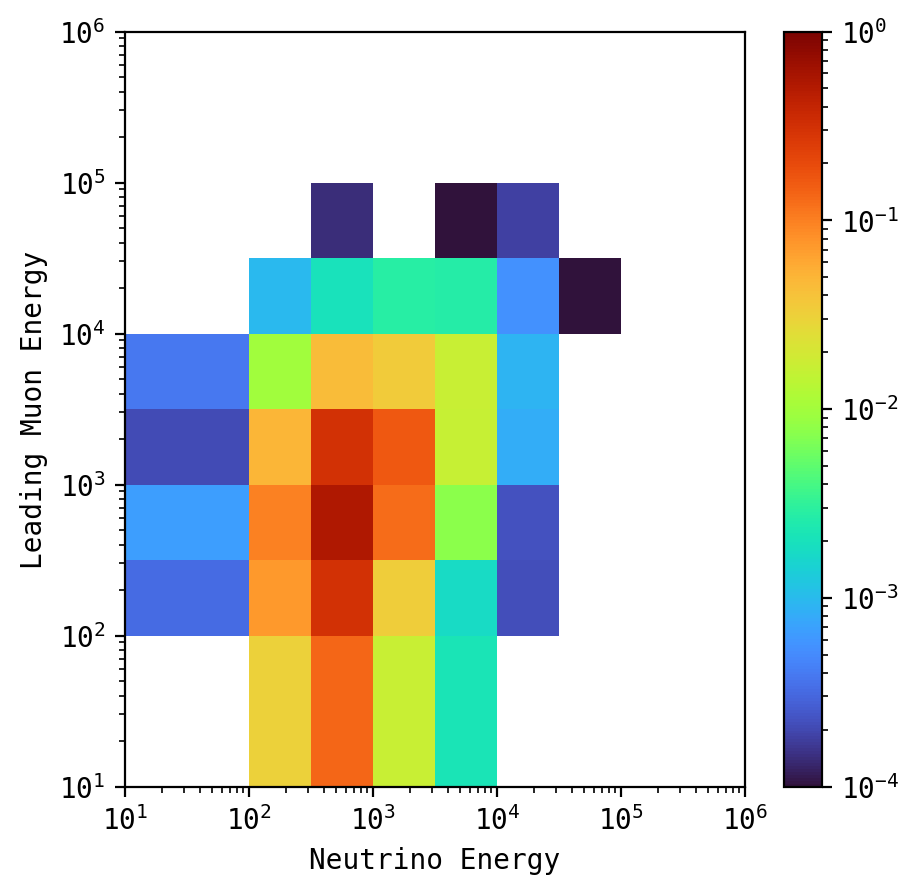

In [6]:
spline_test = np.load('/data/user/zrechav/output_SelfVeto_Correlation_Tables/histograming/1D/NuMu_Single_Zen_0.8_Depth_2.1.npy')
mpl.rcParams["font.family"] = 'monospace'
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
f, ax = plt.subplots(1,1,figsize=(5,5), dpi = 200)
plt.pcolormesh(E_nu_bins, E_mu_bins, spline_test.T,
                       cmap='turbo', norm=clrs.LogNorm(vmin=10**-4, vmax=1))
#plt.title(f'Index in E_nu_bins')
plt.xlabel('Neutrino Energy')
plt.ylabel('Leading Muon Energy')

#plt.xlim(10,10**7)
#print(nu_ticks)
plt.xscale('log')
plt.yscale('log')
plt.xticks(nu_ticks)
#plt.axvline(x=gridpts[14])
plt.colorbar()
plt.show()

In [18]:
##normalization functions by Zoe
def one_dimensional_normalization(spline):
    spline = np.round(spline, decimals=8)
    threshold = 1e-8

    spline[spline < threshold] = 0
    dims = spline.shape[0]
    dims_mu = spline.shape[1]
    norm_hist = np.empty((dims,dims_mu))
    for index in range(dims):
        piece = spline[index,:]
        norm_piece = piece /np.sum(piece)
        norm_piece =np.nan_to_num(norm_piece)
        norm_hist[index,:]=norm_piece
    return norm_hist

In [5]:
E_nu_bins

array([1.00000000e+01, 1.00000000e+02, 3.16227766e+02, 1.00000000e+03,
       3.16227766e+03, 1.00000000e+04, 3.16227766e+04, 1.00000000e+05,
       3.16227766e+05, 1.00000000e+06])

In [7]:
I3_file_path = '/data/user/zrechav/simulation_scripts/22042/step_0_inject_veto_muons/00000-00999/Level0.0_nugen_IC86.2012_pass2.022042.000000.i3.bz2'
I3_file = dataio.I3File(I3_file_path)
frame = I3_file.pop_daq()
frame.keys()

['MMCTrackList',
 'MCVetoMuonInjectionInfo',
 'I3MCTreeVetoMuon_preMuonProp_RNGState',
 'I3MCTreeVetoMuon_preMuonProp',
 'MMCTrackListVetoMuon',
 'I3MCTreeVetoMuon',
 'I3MCTree',
 'OldRunNumber',
 'I3MCWeightDict',
 'CombinedMuonVetoI3MCTree',
 'OldEventID',
 'BiasedSimulationWeight']

In [8]:
oldrunnumber = frame['OldEventID']
print(oldrunnumber)
muoninfo = frame['MCVetoMuonInjectionInfo']
muoninfo.keys()
len(muoninfo)

I3Double(3835)


11

In [9]:
frame['I3MCWeightDict']['TotalWeight']

1.826330551897817e-05

In [10]:
muoninfo['muon_1_energy']

749.8942093324558

In [56]:
multiplicity = []
old_run_num = []
muon_one_energy = []
muon_two_energy = []
muon_three_energy = []
muon_four_energy = []
number_muons_injected = []
weight = []

I3_file_path = '/data/user/zrechav/simulation_scripts/22042/step_0_inject_veto_muons/00000-00999/Level0.0_nugen_IC86.2012_pass2.022042.000000.i3.bz2'
I3_file = dataio.I3File(I3_file_path)
for i in range((2000)):
    #print(i)
    frame = I3_file.pop_daq()
    oldrunnumber = frame['OldEventID'].value
    if oldrunnumber == 7469.0:
        counter = 0
        old_run_num.append(oldrunnumber)

        muoninfo = frame['MCVetoMuonInjectionInfo']
        muon_1_energy = muoninfo['muon_1_energy']
        muon_one_energy.append(muon_1_energy)
        if muon_1_energy != 0:
            counter +=1

        muon_2_energy = muoninfo['muon_2_energy']
        muon_two_energy.append(muon_2_energy)
        if muon_2_energy != 0:
                    counter +=1
        muon_3_energy = muoninfo['muon_3_energy']
        muon_three_energy.append(muon_3_energy)
        if muon_3_energy != 0:
            counter +=1

        muon_4_energy = muoninfo['muon_4_energy']
        muon_four_energy.append(muon_4_energy)
        if muon_4_energy != 0:
            counter +=1
        Multi = muoninfo['MultiplicitySample']
        multiplicity.append(Multi)

        Weight = frame['I3MCWeightDict']['TotalWeight']
        weight.append(Weight)
        
        number_muons_injected.append(counter)

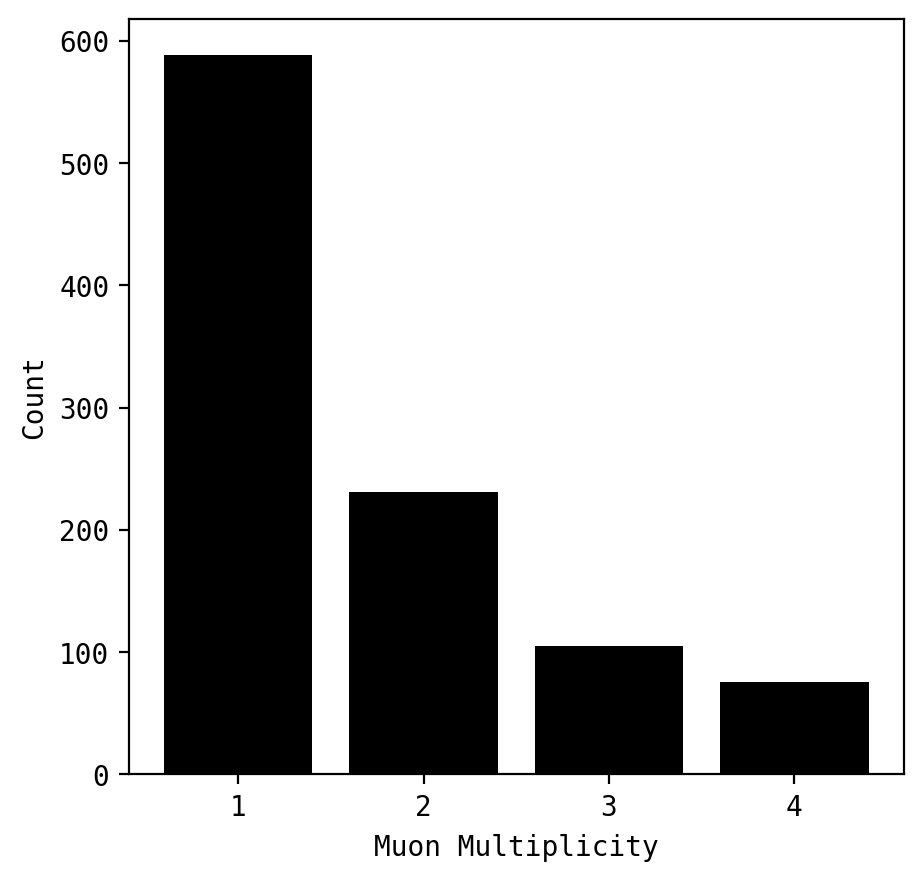

In [57]:
import matplotlib.pyplot as plt
from collections import Counter



# Count the occurrences of each value
value_counts = Counter(number_muons_injected)

# Extract values and counts
values = list(value_counts.keys())
counts = list(value_counts.values())

# Create a bar plot
f, ax = plt.subplots(1,1,figsize=(5,5), dpi = 200)
plt.bar(values, counts, tick_label=values,color='black')

# Set plot labels and title
plt.xlabel('Muon Multiplicity')
plt.ylabel('Count')
plt.title('')

# Show the plot
plt.show()


In [58]:
import numpy as np

# Assuming muon_one_energy and muon_two_energy are NumPy arrays
muon_one_energy = np.array(muon_one_energy)
muon_two_energy = np.array(muon_two_energy)
muon_three_energy = np.array(muon_three_energy)
muon_four_energy = np.array(muon_four_energy)
Mask = [energy < 10.0 for energy in muon_two_energy]


In [59]:
print(np.count_nonzero(muon_one_energy < 10))
print(np.count_nonzero(muon_one_energy < 20))
print(np.count_nonzero(muon_one_energy < 30))
print(np.count_nonzero(muon_one_energy < 40))
print(np.count_nonzero(muon_one_energy < 50))
print(np.count_nonzero(muon_one_energy < 100))
print(np.count_nonzero(muon_one_energy < 150))

0
31
31
31
72
72
72


In [60]:
#muon_energy,_ = np.histogram(muon_one_energy,bins = gridpts,weights = weight)
Mask = [energy < 10.0 for energy in muon_two_energy]
#Mask3 = np.concatenate(Mask,Mask_3)
#print(Mask_4)
gridpts = E_mu_bins
muon_energy,_ = np.histogram(muon_one_energy[Mask],bins = gridpts)
print(np.sum(muon_energy))
muon_one,_ = np.histogram(muon_one_energy,bins = gridpts)
muon_two,_ = np.histogram(muon_two_energy,bins = gridpts)
muon_three,_ = np.histogram(muon_three_energy,bins = gridpts)
muon_four,_ = np.histogram(muon_four_energy,bins = gridpts)
#muon_sum,_ = np.histogram(muon_one_energy+muon_two_energy+muon_three_energy+muon_four_energy, bins = gridpts)
muon_sum = muon_one + muon_two + muon_three + muon_four

588


In [18]:
coszen= np.cos(37.1776)
depth = 1948 - (-221.33)
p_energy = 6983.54
reco_energy = 2410
flavour = 'NuMu'


/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


Text(0.5, 1.0, '1D Distributions for Normalized Energy Indices')

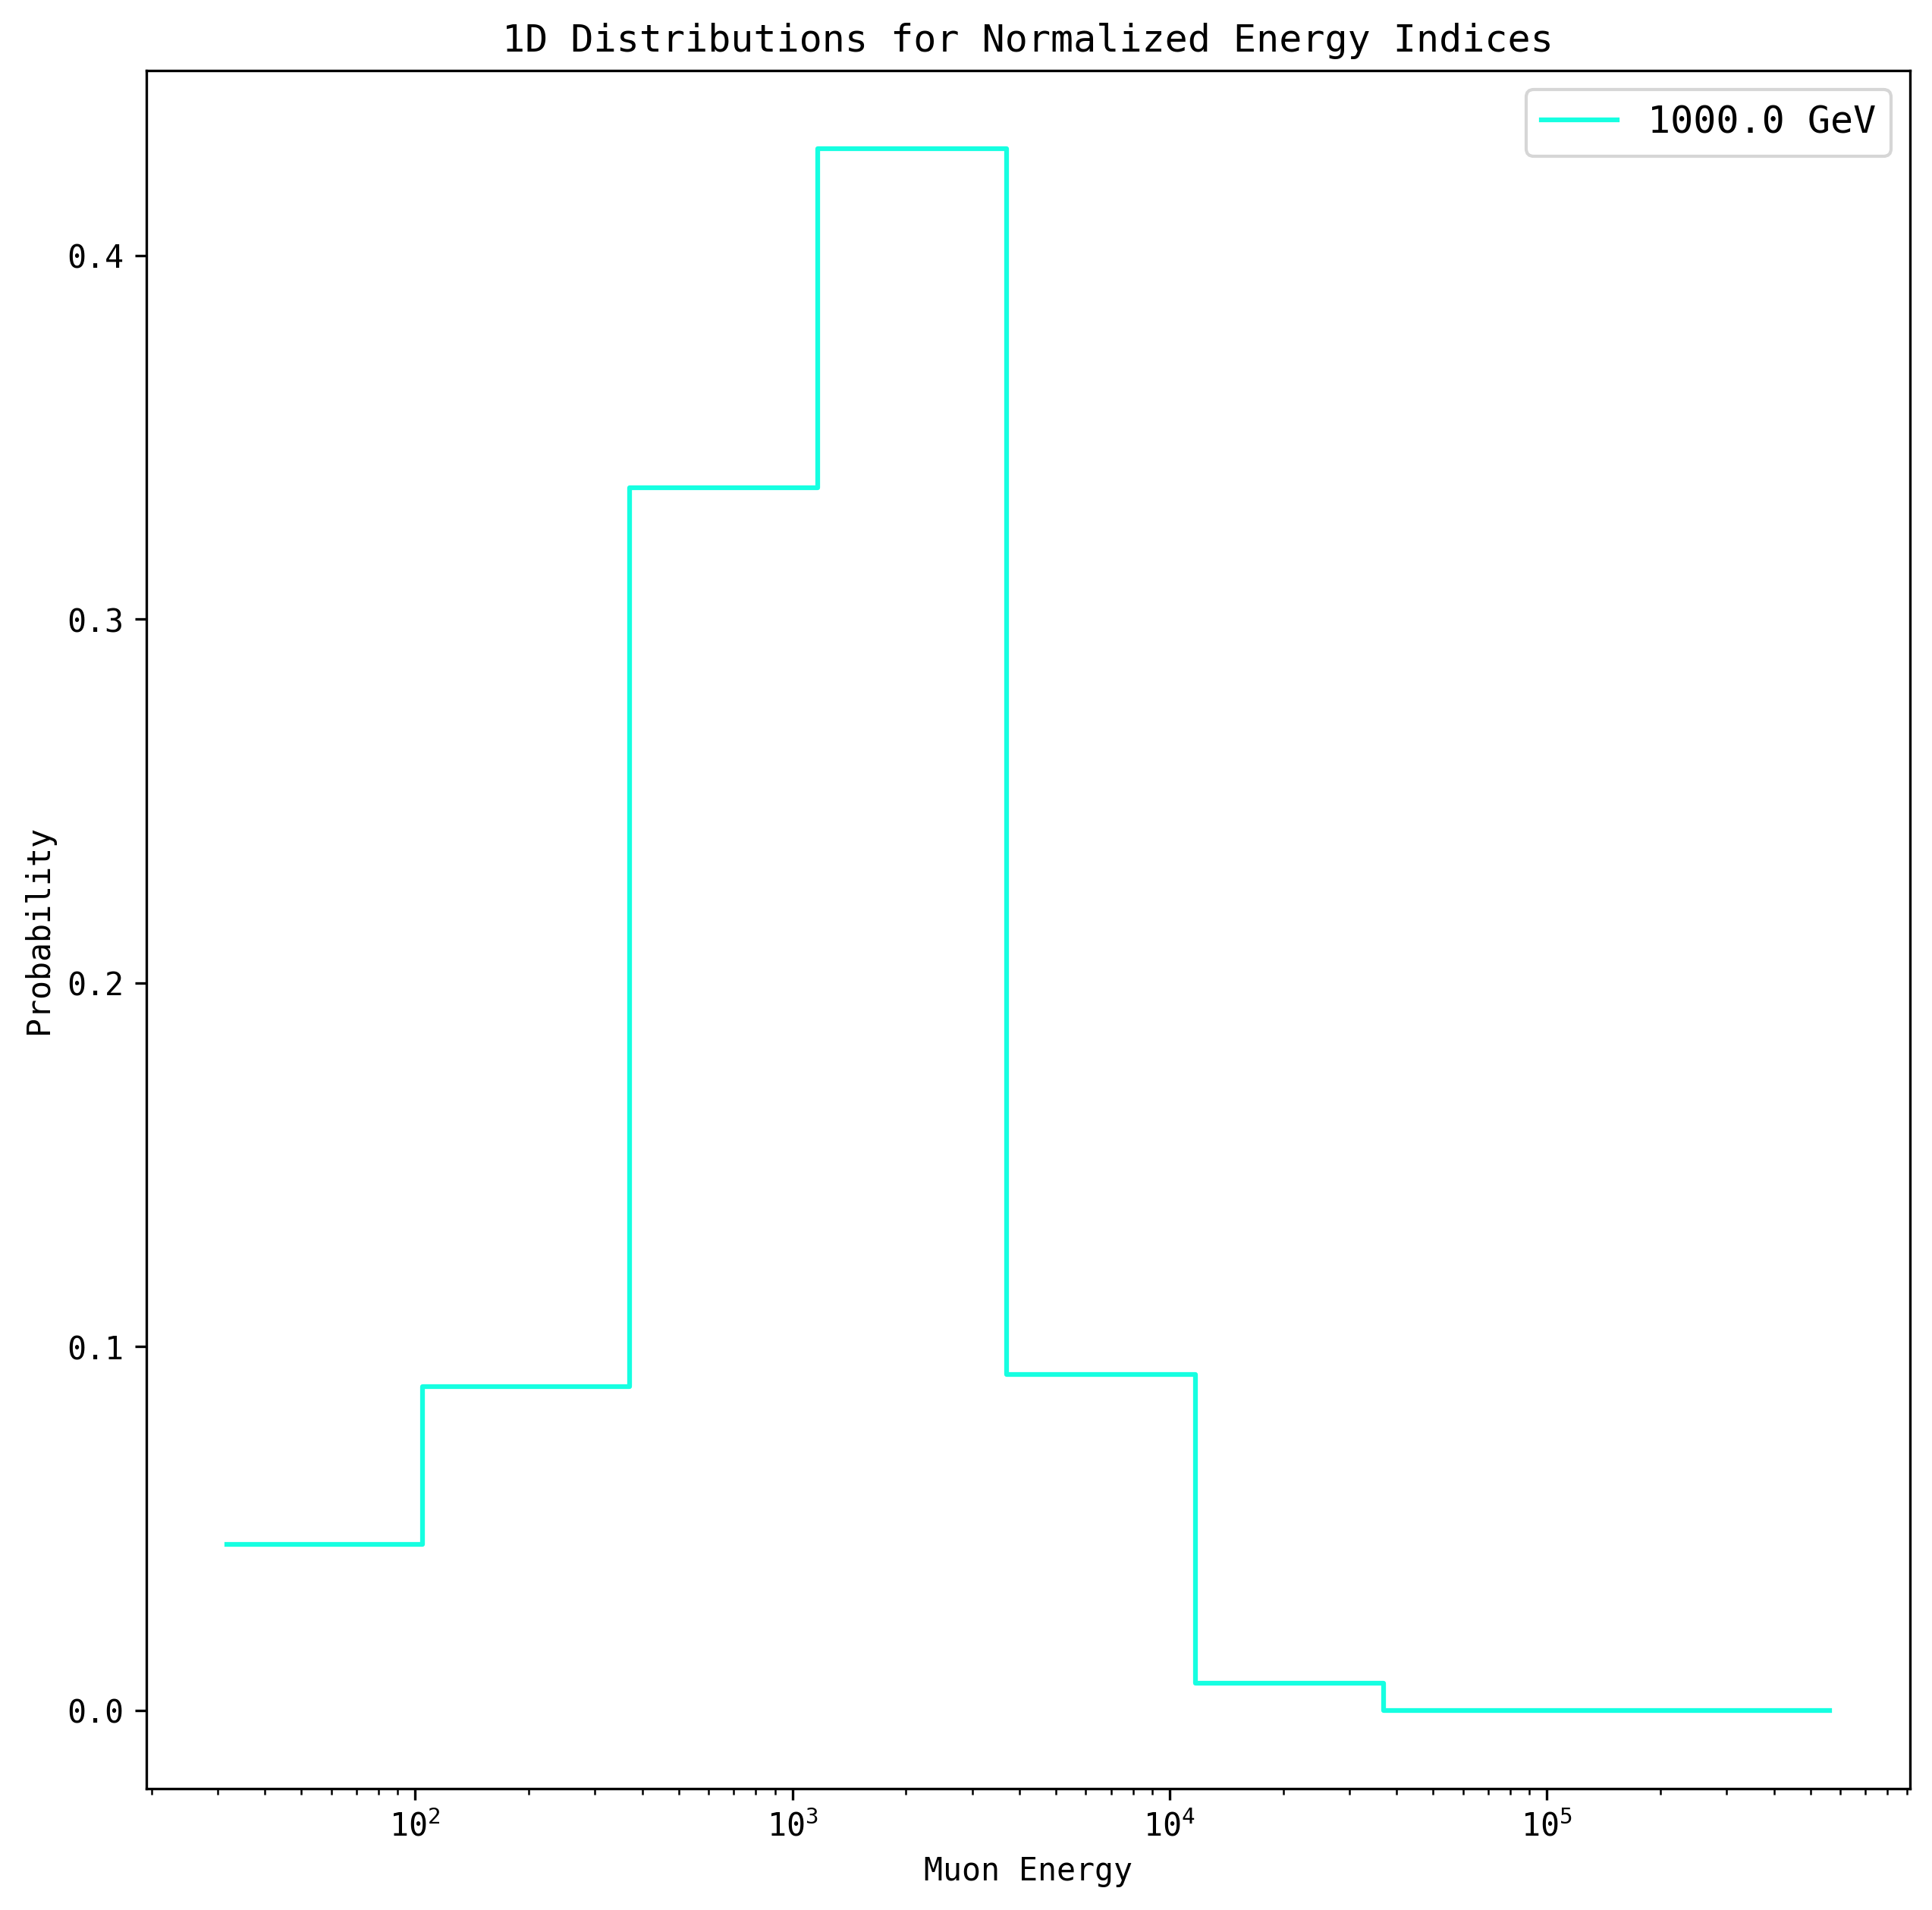

In [35]:
#files = sorted(glob.glob('/data/user/zrechav/output_SelfVeto_Correlation_Tables/histograming/1D/*'))
#for file in files:
file = '/data/user/zrechav/output_SelfVeto_Correlation_Tables/histograming/1D/NuMu_Single_Zen_0.8_Depth_2.1.npy'
ONE_D = np.load(file)
ONE_D = one_dimensional_normalization(ONE_D)
ax_pieces = []
f, ax = plt.subplots(ncols=1, figsize=(10, 10), dpi=300)
ax2 = ax
for i in range(ONE_D.shape[0]):
    color = plt.cm.jet(i / (ONE_D.shape[0] - 1))  # Use 'Blues' colormap
    ax_pieces.append(ONE_D[i])
    if i ==3:
        ax2.step(E_mu_bin_centers, ONE_D[i], label=f'{np.round(E_nu_bins[i],2)} GeV', where='mid',color=color)
ax2.set_xscale('log')
#ax2.set_yscale('log')
ax2.set_xlabel('Muon Energy')
ax2.set_ylabel('Probability')
ax2.legend(fontsize=12)
ax2.set_title('1D Distributions for Normalized Energy Indices')

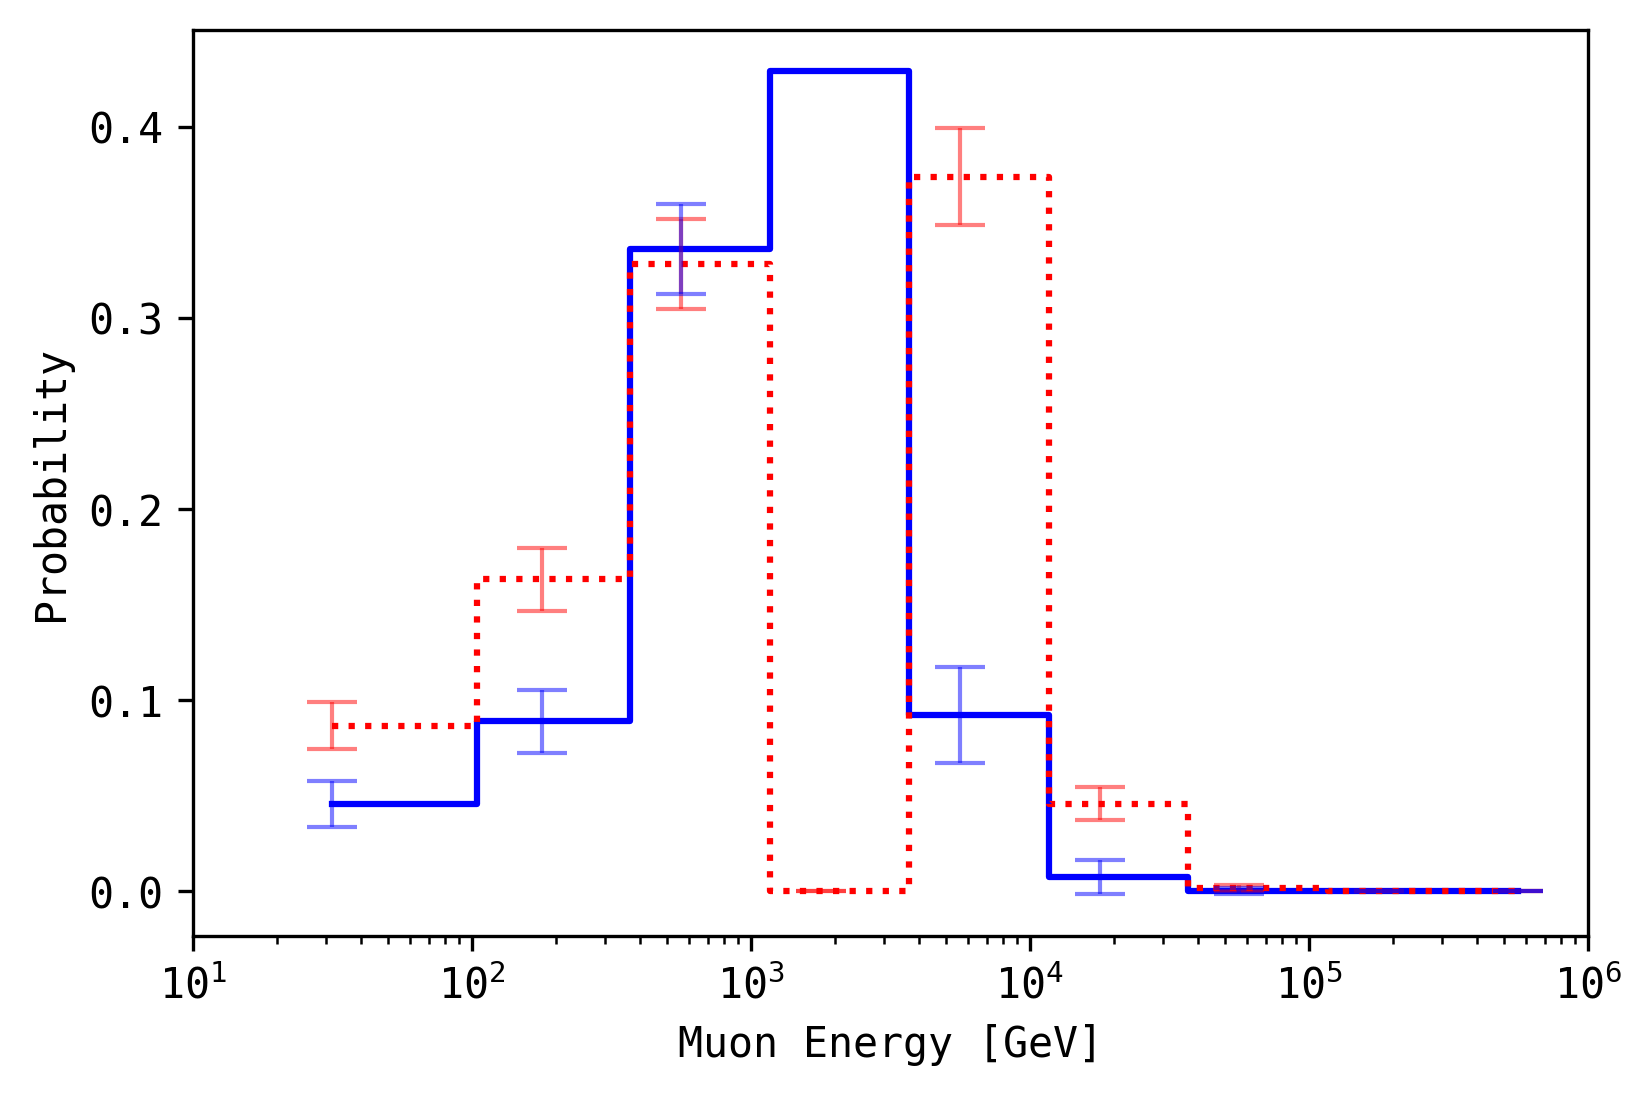

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have data for axis_pieces[7] and muon_energy
# Replace this with your actual data



fig, ax1 = plt.subplots(dpi=300)

# Plot the first dataset on the left y-axis
line1, = ax1.step(E_mu_bin_centers, ax_pieces[3], label='2410 GeV table estimate',where='mid',color='blue')
muon_energy_normalized = muon_energy / np.sum(muon_energy)
# Plot the second dataset on the right y-axis
line2, = ax1.step(E_mu_bin_centers, muon_energy_normalized, where='mid',label='Post-Injection: One Leading Muon', linestyle='dotted', color='red')

# Calculate error band

errors = np.sqrt(muon_energy) / np.sum(muon_energy)
ax1.errorbar(E_mu_bin_centers, muon_energy_normalized, yerr=errors, fmt='none',ecolor='red', capsize=6, capthick=1, elinewidth=1,alpha=.5)
ax1.errorbar(E_mu_bin_centers, ax_pieces[3], yerr=errors, fmt='none',ecolor='blue', capsize=6, capthick=1, elinewidth=1,alpha=.5)

#ax1.fill_between(bin_centers, filled_band_lower, filled_band_upper, step='mid', color='green', alpha=0.2, label='Error Band')

#lines = [line1, line2]
#labels = [line.get_label() for line in lines]
#ax1.legend(lines, labels, loc='upper right', fontsize=8)

# Set the x-axis to log scale
ax1.set_xscale('log')
ax1.set_xlim(10**1,10**6)
# Set labels for the axes
ax1.set_xlabel('Muon Energy [GeV]')
ax1.set_ylabel('Probability', color='black')
#ax1.set_ylim(0, 0.3)

plt.show()




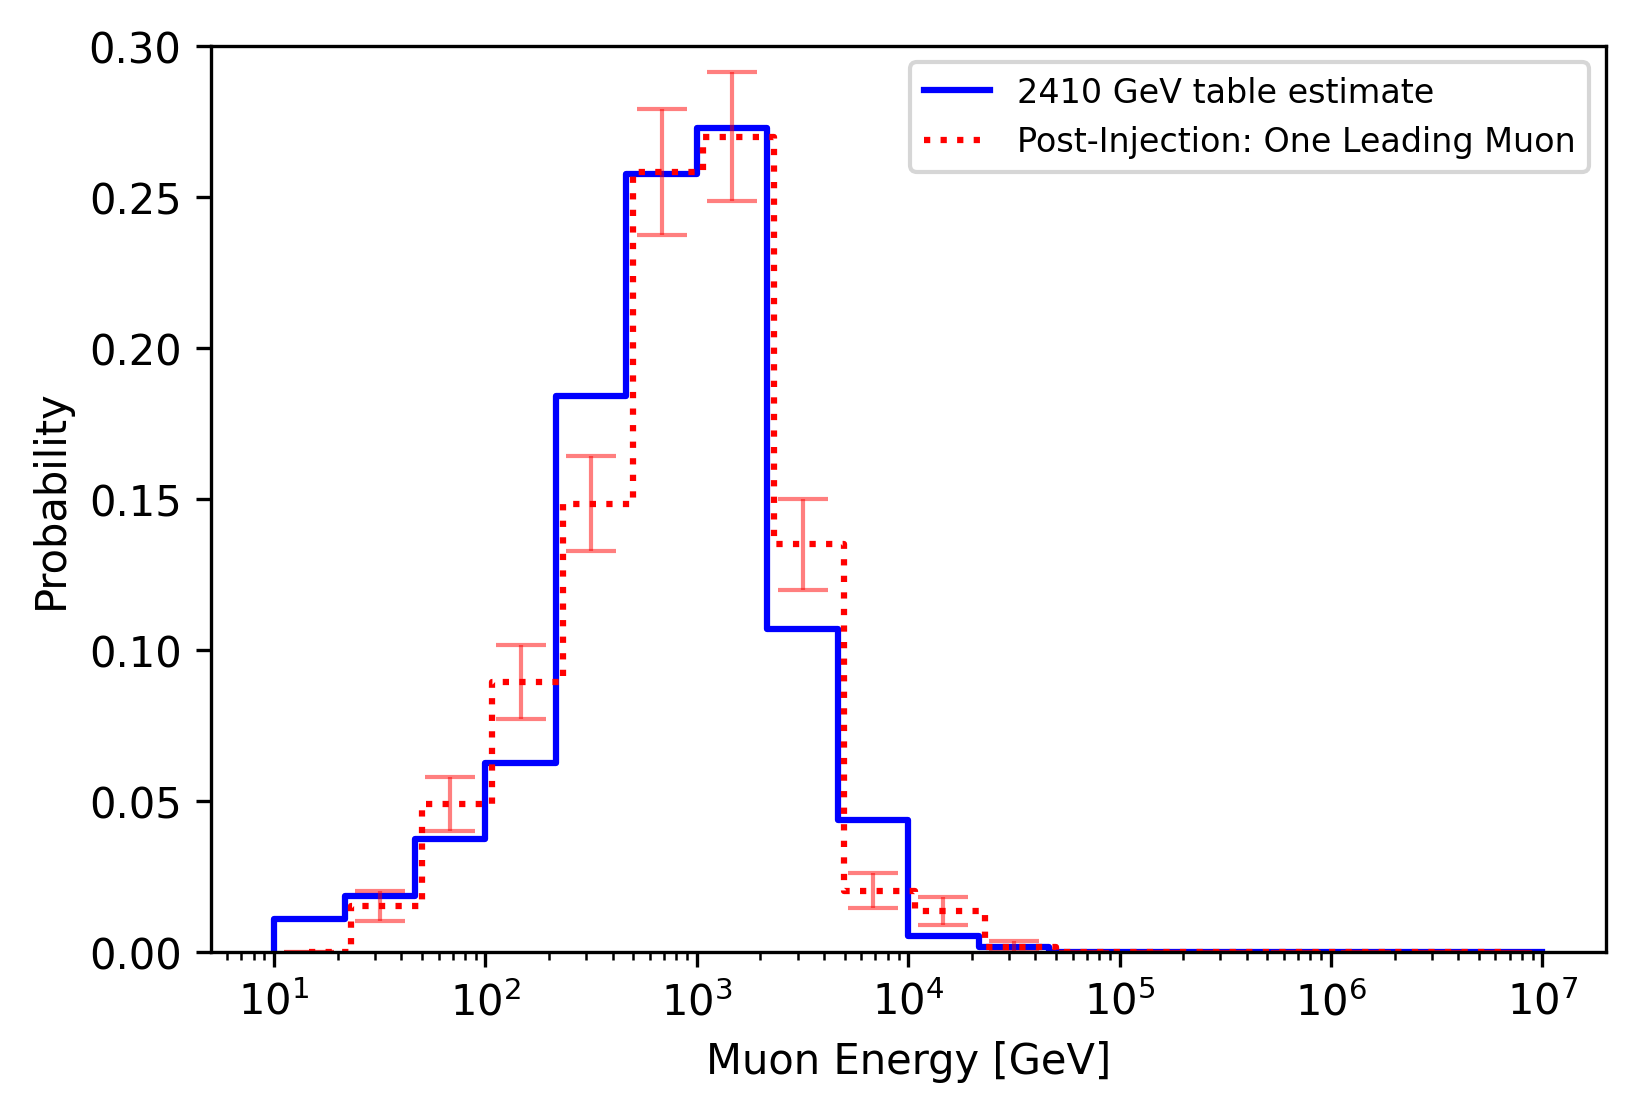

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have data for axis_pieces[7] and muon_energy
# Replace this with your actual data

bin_centers = np.sqrt(gridpts[:-1] * gridpts[1:])

fig, ax1 = plt.subplots(dpi=300)

# Plot the first dataset on the left y-axis
line1, = ax1.step(gridpts, axis_pieces[7], label='2410 GeV table estimate', color='blue')



# Plot the second dataset on the right y-axis
line2, = ax1.step(bin_centers, muon_energy / np.sum(muon_energy), where='mid', label='Post-Injection: One Leading Muon', linestyle='dotted', color='red')

# Calculate error band for line2 (red step plot)
muon_energy_normalized = muon_energy / np.sum(muon_energy)
errors_line2 = np.sqrt(muon_energy) / np.sum(muon_energy)
ax1.errorbar(bin_centers, muon_energy_normalized, yerr=errors_line2, fmt='none', ecolor='red', capsize=6, capthick=1, elinewidth=1, alpha=0.5)

lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right', fontsize=8)

# Set the x-axis to log scale
ax1.set_xscale('log')

# Set labels for the axes
ax1.set_xlabel('Muon Energy [GeV]')
ax1.set_ylabel('Probability', color='black')
ax1.set_ylim(0, 0.3)

plt.show()

